<a href="https://colab.research.google.com/github/randy-tsukemen/Data_science_roadmap/blob/master/Practicing_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handling missing data

![](https://i.imgur.com/hzjuePZ.png)

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://assets.datacamp.com/production/repositories/4983/datasets/db66797c50f6938065374e9a31353053fb542052/LoansTrainingSetReduced.csv"
loan_data = pd.read_csv(url)

# Print missing values
print(loan_data.isna().sum())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job                0
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    48506
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      192
Tax Liens                           8
dtype: int64


In [2]:
# Drop rows with missing values
dropNArows = loan_data.dropna(axis=0)

# Print percentage of rows remaining
print(dropNArows.shape[0]/loan_data.shape[0] * 100)

34.347092565515695


In [3]:
# Drop columns with missing values
dropNAcols = loan_data.dropna(axis=1)

# Print percentage of columns remaining
print(dropNAcols.shape[1]/loan_data.shape[1] * 100)

70.58823529411765


In [4]:
# Fill missing values with zero
loan_data_filled = loan_data.fillna(0)

# Examine 'Credit Score' before
print(loan_data['Credit Score'].describe())

# Examine 'Credit Score' after
print(loan_data_filled['Credit Score'].describe())

count    67572.000000
mean       721.601951
std         27.427709
min        585.000000
25%        710.000000
50%        730.000000
75%        741.000000
max        751.000000
Name: Credit Score, dtype: float64
count    88910.000000
mean       548.420729
std        309.109970
min          0.000000
25%        632.000000
50%        719.000000
75%        739.000000
max        751.000000
Name: Credit Score, dtype: float64


In [5]:
# Import imputer module
from sklearn.impute import SimpleImputer

# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])

# Impute with mean
imp_mean = SimpleImputer(strategy='mean')
loans_imp_mean = imp_mean.fit_transform(numeric_cols)

# Convert returned array to DataFrame
loans_imp_meanDF = pd.DataFrame(loans_imp_mean, columns=numeric_cols.columns)

# Check the DataFrame's info
print(loans_imp_meanDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88910 entries, 0 to 88909
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           88910 non-null  float64
 1   Credit Score                  88910 non-null  float64
 2   Years in current job          88910 non-null  float64
 3   Annual Income                 88910 non-null  float64
 4   Monthly Debt                  88910 non-null  float64
 5   Years of Credit History       88910 non-null  float64
 6   Months since last delinquent  88910 non-null  float64
 7   Number of Open Accounts       88910 non-null  float64
 8   Number of Credit Problems     88910 non-null  float64
 9   Current Credit Balance        88910 non-null  float64
 10  Maximum Open Credit           88910 non-null  float64
 11  Bankruptcies                  88910 non-null  float64
 12  Tax Liens                     88910 non-null  float64
dtypes

In [6]:
# Explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
# Now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])

# Iteratively impute
imp_iter = IterativeImputer(max_iter=5, sample_posterior=True, random_state=123)
loans_imp_iter = imp_iter.fit_transform(numeric_cols)

# Convert returned array to DataFrame
loans_imp_iterDF = pd.DataFrame(loans_imp_iter, columns=numeric_cols.columns)

# Check the DataFrame's info
print(loans_imp_iterDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88910 entries, 0 to 88909
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           88910 non-null  float64
 1   Credit Score                  88910 non-null  float64
 2   Years in current job          88910 non-null  float64
 3   Annual Income                 88910 non-null  float64
 4   Monthly Debt                  88910 non-null  float64
 5   Years of Credit History       88910 non-null  float64
 6   Months since last delinquent  88910 non-null  float64
 7   Number of Open Accounts       88910 non-null  float64
 8   Number of Credit Problems     88910 non-null  float64
 9   Current Credit Balance        88910 non-null  float64
 10  Maximum Open Credit           88910 non-null  float64
 11  Bankruptcies                  88910 non-null  float64
 12  Tax Liens                     88910 non-null  float64
dtypes

## Data distributions and transformations
![123](https://i.imgur.com/X7s8mjZ.png)

<Figure size 432x288 with 0 Axes>

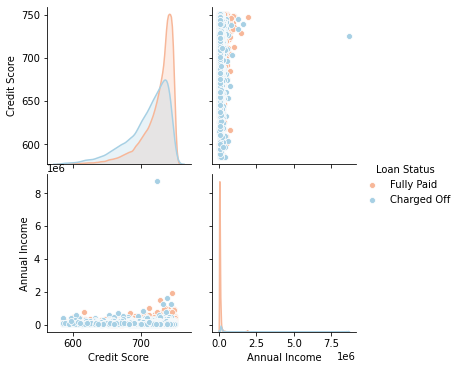

<Figure size 432x288 with 0 Axes>

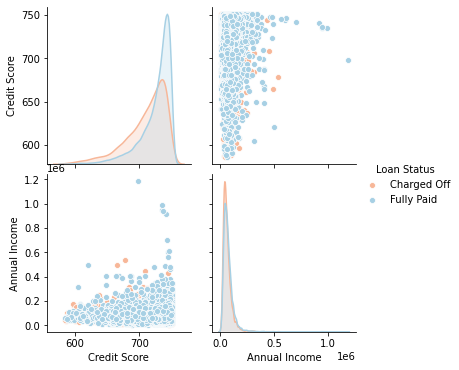

In [7]:
from sklearn.model_selection import train_test_split
# Create `loan_data` subset: loan_data_subset
loan_data_subset = loan_data[['Credit Score','Annual Income','Loan Status']]

# Create train and test sets
trainingSet, testSet = train_test_split(loan_data_subset, test_size=0.2, random_state=123)

# Examine pairplots
plt.figure()
sns.pairplot(trainingSet, hue='Loan Status', palette='RdBu')
plt.show()

plt.figure()
sns.pairplot(testSet, hue='Loan Status', palette='RdBu')
plt.show()

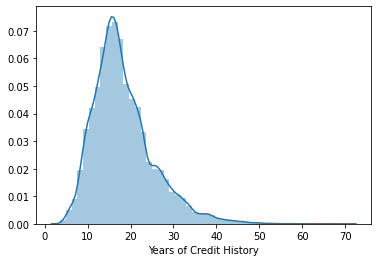

In [8]:
# Subset loan_data
cr_yrs = loan_data['Years of Credit History']

# Histogram and kernel density estimate
plt.figure()
sns.distplot(cr_yrs)
plt.show()

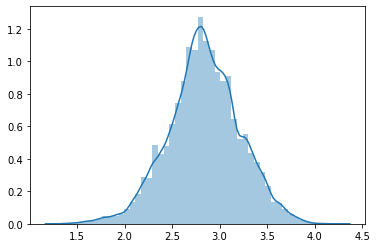

In [9]:
from scipy.stats import boxcox
# Subset loan_data
cr_yrs = loan_data['Years of Credit History']

# Box-Cox transformation
cr_yrs_log = boxcox(cr_yrs, lmbda=0.0)

# Histogram and kernel density estimate
plt.figure()
sns.distplot(cr_yrs_log)
plt.show()

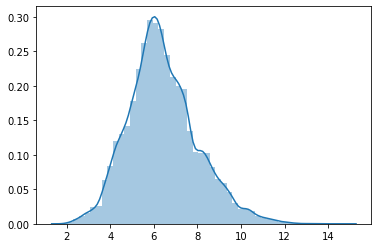

In [10]:
# Subset loan_data
cr_yrs = loan_data['Years of Credit History']

# Square root transform
cr_yrs_sqrt = boxcox(cr_yrs, lmbda=0.5)

# Histogram and kernel density estimate
plt.figure()
sns.distplot(cr_yrs_sqrt)
plt.show()

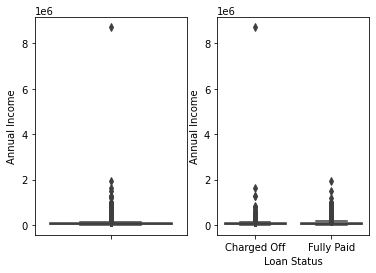

In [11]:
# Import modules
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate and multivariate boxplots
fig, ax =plt.subplots(1,2)
sns.boxplot(y=loan_data['Annual Income'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Annual Income', data=loan_data, ax=ax[1])
plt.show()

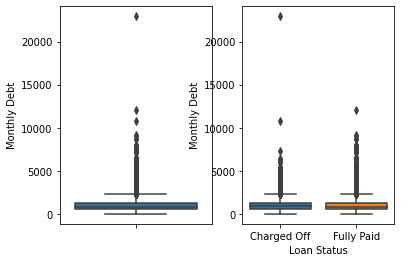

In [12]:
# Import modules
import matplotlib.pyplot as plt
import seaborn as sns

# Multivariate boxplot
fig, ax =plt.subplots(1,2)
sns.boxplot(y=loan_data['Monthly Debt'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Monthly Debt', data=loan_data, ax=ax[1])
plt.show()

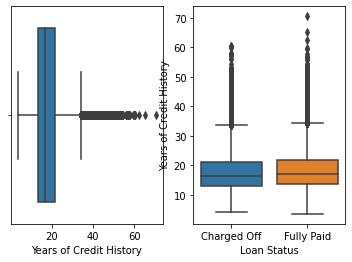

In [13]:
# Import modules
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate and multivariate boxplots
fig, ax =plt.subplots(1,2)
sns.boxplot(x=loan_data['Years of Credit History'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Years of Credit History', data=loan_data, ax=ax[1])
plt.show()

In [14]:
from scipy import stats
# Subset features
numeric_cols = loan_data.select_dtypes(include=[np.number])
categoric_cols = loan_data.select_dtypes(include=[object])
# Print: before dropping
print(numeric_cols.mean())
print(numeric_cols.median())
print(numeric_cols.max())

# Create index of rows to keep
idx = (np.abs(stats.zscore(numeric_cols)) < 3).all(axis=1)

# Concatenate numeric and categoric subsets
ld_out_drop = pd.concat([numeric_cols.loc[idx], categoric_cols.loc[idx]], axis=1)

# Print: after dropping
print(ld_out_drop.mean())
print(ld_out_drop.median())
print(ld_out_drop.max())

Current Loan Amount             1.433878e+07
Credit Score                    7.216020e+02
Years in current job            5.721263e+00
Annual Income                   7.234575e+04
Monthly Debt                    9.631021e+02
Years of Credit History         1.831531e+01
Months since last delinquent    3.508029e+01
Number of Open Accounts         1.111035e+01
Number of Credit Problems       1.604769e-01
Current Credit Balance          1.543593e+04
Maximum Open Credit             3.356812e+04
Bankruptcies                    1.126716e-01
Tax Liens                       2.822209e-02
dtype: float64
Current Loan Amount             14355.000
Credit Score                      730.000
Years in current job                6.000
Annual Income                   61494.000
Monthly Debt                      843.925
Years of Credit History            17.000
Months since last delinquent       32.000
Number of Open Accounts            10.000
Number of Credit Problems           0.000
Current Credit Balance

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


In [15]:
# Print: before winsorize
print((loan_data['Monthly Debt']).mean())
print((loan_data['Monthly Debt']).median())
print((loan_data['Monthly Debt']).max())

# Winsorize numeric columns
debt_win = stats.mstats.winsorize(loan_data['Monthly Debt'], limits=[0.05, 0.05])

# Convert to DataFrame, reassign column name
debt_out = pd.DataFrame(debt_win, columns=['Monthly Debt'])

# Print: after winsorize
print(debt_out.mean())
print(debt_out.median())
print(debt_out.max())

963.1020592734293
843.925
22939.12
Monthly Debt    935.371257
dtype: float64
Monthly Debt    843.925
dtype: float64
Monthly Debt    2115.52
dtype: float64


In [16]:
# Print: before replace with median
print((loan_data['Monthly Debt']).mean())
print((loan_data['Monthly Debt']).median())
print((loan_data['Monthly Debt']).max())

# Find median
median = loan_data.loc[loan_data['Monthly Debt'] < 2120, 'Monthly Debt'].median()
loan_data['Monthly Debt'] = np.where(loan_data['Monthly Debt'] > 2120, median, loan_data['Monthly Debt'])

print((loan_data['Monthly Debt']).mean())
print((loan_data['Monthly Debt']).median())
print((loan_data['Monthly Debt']).max())

963.1020592734293
843.925
22939.12
866.8290722078564
811.51
2119.72


In [17]:
from sklearn.preprocessing import StandardScaler
# Subset features
numeric_cols = loan_data.select_dtypes(include=[np.number])
categoric_cols = loan_data.select_dtypes(include=[object])

# Instantiate
scaler = StandardScaler()

# Fit and transform, convert to DF
numeric_cols_scaled = scaler.fit_transform(numeric_cols)
numeric_cols_scaledDF = pd.DataFrame(numeric_cols_scaled, columns=numeric_cols.columns)

# Concatenate categoric columns to scaled numeric columns
final_DF = pd.concat([numeric_cols_scaledDF, categoric_cols], axis=1)
print(final_DF.head())

   Current Loan Amount  Credit Score  ...  Home Ownership            Purpose
0            -0.408982      0.233271  ...            Rent  DebtConsolidation
1            -0.408617      0.415570  ...        Mortgage  DebtConsolidation
2            -0.408871      0.087432  ...        Mortgage   HomeImprovements
3            -0.408997      0.670788  ...            Rent  DebtConsolidation
4            -0.409052     -1.298038  ...        Mortgage   HomeImprovements

[5 rows x 17 columns]


# Supervised Learning


![](https://miro.medium.com/max/2000/1*LJ0slb7apPb1fQWVTAX2CA.jpeg)

## Regression: feature selection

- [Feature selection techniques for classification and Python tips for their application](https://towardsdatascience.com/feature-selection-techniques-for-classification-and-python-tips-for-their-application-10c0ddd7918b)
- [Chi-Square Test for Feature Selection in Machine learning](https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223)
- [ANOVA for Feature Selection in Machine Learning](https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476)

### Selecting the correct features:
- Reduces overfitting
- Improves accuracy
- Increases interpretability
- Reduces training time

### Feature selection methods
- Filter: Rank features based on statistical performance
- Wrapper: Use an ML method to evaluate performance
- Embedded: Iterative model training to extract features
- Feature importance: tree-based ML models


### Compare and contrast methods
|Method |Use an ML model |Select best subset |Can overfit|
| -------- | -------- | -------- | -------- |
|Filter |No |No |No|
|Wrapper |Yes |Yes |Sometimes|
|Embedded |Yes |Yes |Yes|
|Feature importance |Yes |Yes |Yes|

### Correlation coeficient statistical tests
|Feature/Response |Continuous |Categorical|
| -------- | -------- | -------- |
|Continuous |Pearson's Correlation |LDA|
|Categorical |ANOVA |Chi-Square|

### load data

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# load data
url = "https://assets.datacamp.com/production/repositories/4983/datasets/97f3248581b7272784d23df9c30612d9eb0afb8d/diabetes.csv"
diabetes = pd.read_csv(url)
X = diabetes.drop(columns=["progression"])
y = diabetes["progression"]

### Filter functions
|Function |returns|
|---|---|
|df.corr() |Pearson's correlation matrix|
|sns.heatmap(corr_object) |heatmap plot|
|abs() |absolute value|

                  age       sex       bmi  ...        s5        s6  progression
age          1.000000  0.173737  0.185085  ...  0.270777  0.301731     0.187889
sex          0.173737  1.000000  0.088161  ...  0.149918  0.208133     0.043062
bmi          0.185085  0.088161  1.000000  ...  0.446159  0.388680     0.586450
bp           0.335427  0.241013  0.395415  ...  0.393478  0.390429     0.441484
s1           0.260061  0.035277  0.249777  ...  0.515501  0.325717     0.212022
s2           0.219243  0.142637  0.261170  ...  0.318353  0.290600     0.174054
s3          -0.075181 -0.379090 -0.366811  ... -0.398577 -0.273697    -0.394789
s4           0.203841  0.332115  0.413807  ...  0.617857  0.417212     0.430453
s5           0.270777  0.149918  0.446159  ...  1.000000  0.464670     0.565883
s6           0.301731  0.208133  0.388680  ...  0.464670  1.000000     0.382483
progression  0.187889  0.043062  0.586450  ...  0.565883  0.382483     1.000000

[11 rows x 11 columns]


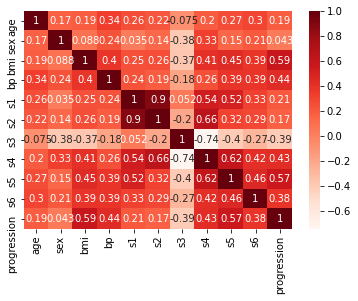

bmi            0.586450
s5             0.565883
progression    1.000000
Name: progression, dtype: float64


In [20]:
# Create correlation matrix and print it
cor = diabetes.corr()
print(cor)

# Correlation matrix heatmap
plt.figure()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Correlation with output variable
cor_target = abs(cor["progression"])

# Selecting highly correlated features
best_features = cor_target[cor_target > 0.5]
print(best_features)

### Wrapper methods
1. Forward selection (LARS-least angle regression)
    - Starts with no features, adds one at a time
2. Backward elimination
    - Starts with all features, eliminates one at a time
3. Forward selection/backward elimination combination (bidirectional elimination)
4. Recursive feature elimination
    - RFECV

|Function |returns|
|---|---|
|`sklearn.svm.SVR` |support vector regression estimator|
|`sklearn.feature_selection.RFECV` |recursive feature elimination with cross-val|
|`rfe_mod.support_` |boolean array of selected features|
|`ref_mod.ranking_` |feature ranking, selected=1|
|`sklearn.linear_model.LinearRegression` |linear model estimator|
|`sklearn.linear_model.LarsCV` |least angle regression with cross-val|
|`LarsCV.score` |r-squared score|
|`LarsCV.alpha_` |estimated regularization parameter|

In [21]:
# Import modules
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV

# Instantiate estimator and feature selector
svr_mod = SVR(kernel="linear")
feat_selector = RFECV(svr_mod, cv=5)

# Fit
feat_selector = feat_selector.fit(X, y)

# Print support and ranking
print(feat_selector.support_)
print(feat_selector.ranking_)
print(X.columns)

[ True False  True  True  True  True  True  True  True  True]
[1 2 1 1 1 1 1 1 1 1]
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


In [22]:
# Import modules
from sklearn.linear_model import LarsCV

# Instantiate
lars_mod = LarsCV(cv=5, normalize=False)

# Fit
feat_selector = lars_mod.fit(X, y)

# Print r-squared score and estimated alpha
print(lars_mod.score(X, y))
print(lars_mod.alpha_)

# Drop feature suggested not important in step 2
X_ = X.drop('sex', axis=1)

# Instantiate
lars_mod = LarsCV(cv=5, normalize=False)

# Fit
feat_selector = lars_mod.fit(X_, y)

# Print r-squared score and estimated alpha
print(lars_mod.score(X_, y))
print(lars_mod.alpha_)

0.5000547926397778
0.16078158387263866
0.4982900996498095
0.05226862285159132


### Tree-based feature importance methods
- Random Forest --> `sklearn.ensemble.RandomForestRegressor`
- Extra Trees --> `sklearn.ensemble.ExtraTreesRegressor`
- After model fit --> `tree_mod.feature_importances_`

In [23]:
# Import
from sklearn.ensemble import RandomForestRegressor

# Instantiate
rf_mod = RandomForestRegressor(max_depth=2, random_state=123, 
              n_estimators=100, oob_score=True)

# Fit
rf_mod.fit(X, y)

# Print
print(diabetes.columns)
print(rf_mod.feature_importances_)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'progression'],
      dtype='object')
[0.         0.         0.39961579 0.03085607 0.         0.00128948
 0.00700339 0.00417891 0.53899467 0.01806168]


In [24]:
# Import
from sklearn.ensemble import ExtraTreesRegressor

# Instantiate
xt_mod = ExtraTreesRegressor()

# Fit
xt_mod.fit(X, y)

# Print
print(diabetes.columns)
print(xt_mod.feature_importances_)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'progression'],
      dtype='object')
[0.05567877 0.03429704 0.25931205 0.11584138 0.05057196 0.05083616
 0.06335773 0.07397052 0.22348158 0.07265282]


### Embedded methods
1. Lasso Regression
2. Ridge Regression
3. ElasticNet


In [25]:
# Import modules
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

# Instantiate cross-validated lasso, fit
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv.fit(X_train, y_train)

# Instantiate lasso, fit, predict and print MSE
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)
print(mean_squared_error(y_true=y_test, y_pred=lasso.predict(X_test)))

2924.5859832897386


In [26]:
lasso.coef_

array([  10.44337568, -258.78524547,  540.21142005,  278.38304827,
       -709.64812829,  359.72602008,   98.8273001 ,  285.87174613,
        631.99600104,  101.92074238])

In [27]:
# Import modules
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
import numpy as np


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

# Instantiate cross-validated ridge, fit
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge_cv.fit(X_train, y_train)

# Instantiate ridge, fit, predict and print MSE
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)
print(mean_squared_error(y_true=y_test, y_pred=ridge.predict(X_test)))

2970.874355984401


In [28]:
ridge.coef_

array([  20.02724484, -210.65528196,  490.6483936 ,  252.31304807,
        -85.60007846,  -84.365296  , -174.9700292 ,  177.80527284,
        371.44401874,  117.87370481])

## Classification: feature engineering

### Feature engineering...why?
- Extracts additional information from the data
- Creates additional relevant features
- One of the most effective ways to improve predictive models

### Benefits of feature engineering
- Increased predictive power of the learning algorithm
- Makes your machine learning models perform even better!

### Types of feature engineering
- Indicator variables
- Interaction features
- Feature representation

### Indicator variables
- Threshold indicator
    - age: high school vs college
- Multiple features
    - used as a flag
- Special events
    - black Friday
    - Christmas
- Groups of classes
    - website traffic paid flag
        - Google adwords
        - Facebook ads

### Interaction features
- Sum
- Difference
- Product
- Quotient
- Other mathematical combos

### Feature representation
- Datetime stamps
    - Day of week
    - Hour of day
- Grouping categorical levels into 'Other'
- Transform categorical to dummy variables
    - (k - 1) binary columns

### Different categorical levels
- Training data:
    - model trained with [red, blue, green]
- Test data:
    - model test with [red, green, yellow]
    - additional color not seen in training
    - one color missing
- [Robust one-hot encoding](https://blog.cambridgespark.com/robust-one-hot-encoding-in-python-3e29bfcec77e)
- [Handling Categorical Data in Python](https://www.datacamp.com/community/tutorials/categorical-data)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

url = "https://assets.datacamp.com/production/repositories/4983/datasets/db66797c50f6938065374e9a31353053fb542052/LoansTrainingSetReduced.csv"
# url = "https://assets.datacamp.com/production/repositories/4983/datasets/a6979e58c5990487b6843a07ebe5143af74d7913/loan_missing_filled.csv"
loan_data = pd.read_csv(url)

# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])

# Impute with mean
imp_mean = SimpleImputer(strategy='mean')
loans_imp_mean = imp_mean.fit_transform(numeric_cols)

# Convert returned array to DataFrame
scaler = StandardScaler()
loans_imp_meanDF = pd.DataFrame(loans_imp_mean, columns=numeric_cols.columns)
loans_imp_meanDF = pd.DataFrame(scaler.fit_transform(loans_imp_meanDF), columns=numeric_cols.columns)
# Create X matrix and y array
X = loans_imp_meanDF.select_dtypes(include=[np.number])
y = loan_data["Loan Status"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Instantiate
logistic = LogisticRegression()

# Fit
logistic.fit(X_train, y_train)

# Predict and print accuracy
print(accuracy_score(y_true=y_test, y_pred=logistic.predict(X_test)))

0.7293142878566341


Debt to income ratio

- Monthly Debt
- Annual Income/12

In [30]:
# Create dti_ratio variable
monthly_income = loan_data["Annual Income"]/12
loan_data["dti_ratio"] = loan_data["Monthly Debt"]/monthly_income * 100
loan_data = loan_data.drop(["Monthly Debt","Annual Income"], axis=1)

# Replace target variable levels
loan_data["Loan Status"] = loan_data["Loan Status"].replace({'Fully Paid': 0, 
                                            'Charged Off': 1})
loan_data = loan_data[['Loan Status', 'Current Loan Amount', 'Credit Score', 'Years in current job', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'dti_ratio']]
# One-hot encode categorical variables
loan_data = pd.get_dummies(data=loan_data)

# Print
print(loan_data.columns)

Index(['Loan Status', 'Current Loan Amount', 'Credit Score',
       'Years in current job', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'dti_ratio'],
      dtype='object')


In [31]:
# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])

# Impute with mean
imp_mean = SimpleImputer(strategy='mean')
loans_imp_mean = imp_mean.fit_transform(numeric_cols)

# Convert returned array to DataFrame
scaler = StandardScaler()
loans_imp_meanDF = pd.DataFrame(loans_imp_mean, columns=numeric_cols.columns)
loans_imp_meanDF = pd.DataFrame(scaler.fit_transform(loans_imp_meanDF), columns=numeric_cols.columns)

# Create X matrix and y array
X = loans_imp_meanDF.select_dtypes(include=[np.number]).drop('Loan Status', axis=1)
y = loan_data["Loan Status"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Instantiate
logistic_dti = LogisticRegression()

# Fit
logistic_dti.fit(X_train, y_train)

# Predict and print accuracy
print(accuracy_score(y_true=y_test, y_pred=logistic_dti.predict(X_test)))

0.730439020732576


## Ensemble learning techniques
- Bootstrap Aggregation
- Boosting
- Model stacking

Bias-Variance Trade-Off
![](https://i.imgur.com/Esfeuap.png)

#### Bagging (Bootstrap aggregation)

- Bootstrapped samples
  - Subset selected with replacement
  - Same row of data may be chosen
- Model built for each sample
- Average the output
- Reduces variance

In [32]:
from sklearn.ensemble import BaggingClassifier
# Instantiate bootstrap aggregation model
bagged_model = BaggingClassifier(n_estimators=50, random_state=123)

# Fit
bagged_model.fit(X_train, y_train)

# Predict
bagged_pred = bagged_model.predict(X_test)

# Print accuracy score
print(accuracy_score(y_test, bagged_pred))

0.7191542008772916


#### Boosting
- Multiple models built sequentially
- Incorrect predictions are weighted
- Reduces bias


#### Model stacking
- Model 1 predictions
- Model 2 predictions...
- Model N predictions
- Stack for highest accuracy model
  - Uses base model (Model N) predictions as input to 2nd level model

In [33]:
from sklearn.ensemble import AdaBoostClassifier
# Boosting model
boosted_model = AdaBoostClassifier(n_estimators=50, random_state=123)

# Fit
boosted_model_fit = boosted_model.fit(X_train, y_train)

# Predict
boosted_pred = boosted_model_fit.predict(X_test)

# Print model accuracy
print(accuracy_score(y_test, boosted_pred))

0.7301765830615229


In [34]:
import xgboost
# Instantiate
xgb = xgboost.XGBClassifier(random_state=123, learning_rate=0.1, n_estimators=10, max_depth=3)

# Fit
xgb = xgb.fit(X_train, y_train)

# Predict
xgb_pred = xgb.predict(X_test)

# Print accuracy score
print('Final prediction score: [%.8f]' % accuracy_score(y_test, xgb_pred))

Final prediction score: [0.72991415]


# Unsupervised Learning

## Dimensionality reduction: feature extraction

### Why dimensionality reduction?
1. Speed up ML training
2. Visualization
3. Improves accuracy
4. Curse of dimensionality
5. Dimensionality reduction != feature selection

### Unsupervised learning methods

- Principal component analysis (PCA)
- Singular value decomposition (SVD)
- Clustering/grouping
- Exploratory data mining

#### PCA
- Relationship between X and y
- Calculated by finding principal axes
- Translates, rotates and scales
- Lower-dimensional projection of the data

In [35]:
# Import module
from sklearn.decomposition import PCA

# Feature matrix and target array
X_diabetes = diabetes.drop('progression', axis=1)
y_diabetes = diabetes['progression']

# PCA
pca = PCA(n_components=3)

# Fit and transform
principalComponents = pca.fit_transform(X_diabetes)

# Print ratio of variance explained
print(pca.explained_variance_ratio_)

[0.40242142 0.14923182 0.12059623]


#### SVD
- Linear algebra and vector calculus
- Decomposes data matrix into three matrices
- Results in 'singular' values
- Variance in data approximately equals SS of singular values

In [36]:
# Import module
from sklearn.decomposition import TruncatedSVD

# Feature matrix and target array
X_diabetes = diabetes.drop('progression', axis=1)
y_diabetes = diabetes['progression']

# SVD
svd = TruncatedSVD(n_components=3)

# Fit and transform
principalComponents = svd.fit_transform(X_diabetes)

# Print ratio of variance explained
print(svd.explained_variance_ratio_)

[0.40242142 0.14923182 0.12059623]


### Visualization techniques
- PCA
- t-SNE

In [37]:
# PCA
pca = PCA(n_components=2)

# Fit and transform
loan_data_PCA = pca.fit_transform(X)

loan_data_PCA = pd.DataFrame(loan_data_PCA)
loan_data_PCA['Loan Status'] = y
loan_data_PCA.columns = ['principal component 1', 'principal component 2', 'Loan Status']


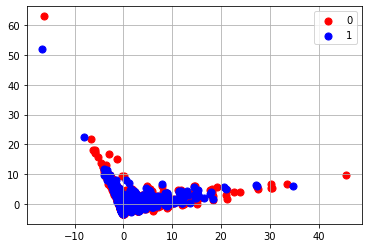

In [38]:
targets = [0, 1]
colors = ['r', 'b']

__, ax = plt.subplots()
# For loop to create plot
for target, color in zip(targets, colors):
    indicesToKeep = loan_data_PCA['Loan Status'] == target
    ax.scatter(loan_data_PCA.loc[indicesToKeep, 'principal component 1']
               , loan_data_PCA.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

# Legend    
ax.legend(targets)
ax.grid()
plt.show()

In [39]:
# Instantiate
pca = PCA(n_components=10)

# Fit and transform
principalComponents = pca.fit_transform(X)

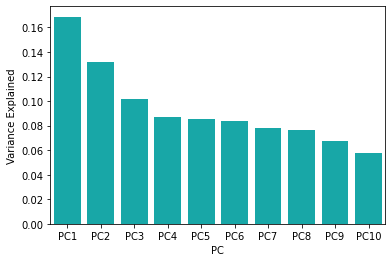

In [40]:
# List principal components names
principal_components = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

# Create a DataFrame
pca_df = pd.DataFrame({'Variance Explained': pca.explained_variance_ratio_,
             'PC':principal_components})

# Plot DataFrame
sns.barplot(x='PC',y='Variance Explained', 
           data=pca_df, color="c")
plt.show()

In [41]:
# Instantiate, fit and transform
pca2 = PCA()
principalComponents2 = pca2.fit_transform(X)

# Assign variance explained
var = pca2.explained_variance_ratio_
var

array([0.1687493 , 0.13209267, 0.10160162, 0.08686668, 0.08548827,
       0.08347035, 0.07778547, 0.07637256, 0.0674801 , 0.05803276,
       0.05644454, 0.00561569])

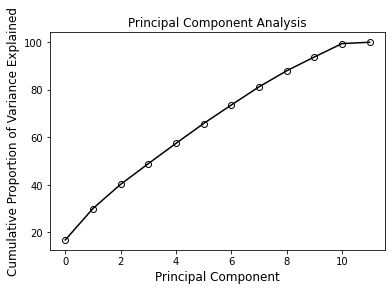

In [42]:
# Plot cumulative variance
cumulative_var = np.cumsum(var)*100
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)
plt.show()

## Clustering algorithms
- Features >> Observations
- Model training more challenging
- Rely on distance calculations
- Most commonly used unsupervised technique

### Practical applications of clustering
- Customer segmentation
- Document classification
- Insurance/transaction fraud detection
- Image segmentation
- Anomaly detection

### K-means
1. Initial centroids
2. Assign each observation to nearest centroid
3. Create new centroids
4. Repeat steps 2 and 3

### Hierarchical agglomerative clustering
Agglomerative clustering linkage

- Ward linkage
- Maximum/complete linkage
- Average linkage
- Single linkage

### Selecting a clustering algorithm
- Cluster stability assessment
- K-means and HC use Euclidian distance
- Inter- and intra-cluster distances

"An appropriate dissimilarity measure is far
more important in obtaining success with
clustering than choice of clustering algorithm." -
from Elements of Statistical Learning
http://www-stat.stanford.edu/~tibs/ElemStatLearn/

K-means clustering

In [43]:
# Import module
from sklearn.cluster import KMeans

# Create feature matrix
X = diabetes.drop("progression", axis=1)

# Instantiate
kmeans = KMeans(n_clusters=20, random_state=123)
# Fit
fit = kmeans.fit(X)

# Print inertia
print("Sum of squared distances for 20 clusters is", kmeans.inertia_)

Sum of squared distances for 20 clusters is 3.505558935079122


Hierarchical agglomerative clustering

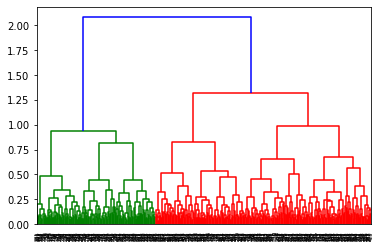

2


In [44]:
# Import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()

# Create clusters and fit
hc = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward')
hc.fit(X)

# Print number of clusters
print(hc.n_clusters_)

### Clustering analysis: choosing the optimal number of clusters

Methods for optimal k
- Silhouette method
- Elbow method

Silhouette coefficient
- Composed of 2 scores
- Mean distance between each observation and all others:
  - in the same cluster
  - in the nearest cluster

Silhouette coefficient values
- Between -1 and 1
  - 1
    - near others in same cluster
    - very far from others in other clusters
  - -1
    - not near others in same cluster
    - close to others in other clusters
  - 0
    - denotes overlapping clusters

Silhouette score

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

Silhouette method

So the highest silhouette score for the diabetes dataset is with n_clusters=2.

In [45]:
# Import modules
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Feature matrix
X = diabetes.drop("progression", axis=1)

# For loop
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters)
    # Fit and predict your k-Means object
    preds = kmeans.fit_predict(X)
    score = silhouette_score(X, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.23698717031681765)
For n_clusters = 3, silhouette score is 0.15350479626184943)
For n_clusters = 4, silhouette score is 0.14144260466735925)
For n_clusters = 5, silhouette score is 0.14880383621681878)
For n_clusters = 6, silhouette score is 0.1452894181250443)
For n_clusters = 7, silhouette score is 0.14556069693069035)
For n_clusters = 8, silhouette score is 0.14338285579947627)


Elbow method

The AgglomerativeClustering(), dendrogram, silhouette score, and elbow method all agree! The best value for k with the diabetes dataset is 2!

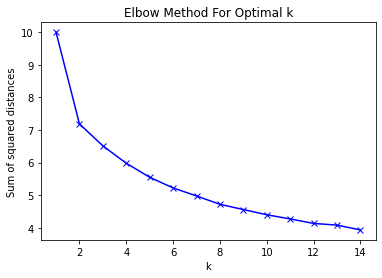

In [46]:
# Create empty list
sum_of_squared_distances = []

# Create for loop
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot
plt.plot(range(1,15), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Model Selection and Evaluation

- Bootstrapping/cross-validation --> model generalization
- Imbalanced classes
- Correlated features
- Ensemble model selection

### Model generalization
- A ML model's ability to perform well on unseen data
  - test dataset
  - future data
- Train metrics ≈ test metrics
- Overfit models do not generalize

Decision tree nodes

- Advantages:
  - Easy to understand
  - Easy to visualize
- Disadvantages:
  - Easily overfit
  - Considered greedy
  - Biased in cases of class imbalance

How do you ensure your model will perform well against test (unseen) data?



In [47]:
# Import modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create X matrix and y array
X = loans_imp_meanDF.select_dtypes(include=[np.number]).drop('Loan Status', axis=1)
y = loan_data["Loan Status"]
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

# Instantiate, Fit, Predict
loans_clf = DecisionTreeClassifier() 
loans_clf.fit(X_train, y_train)
y_pred = loans_clf.predict(X_test)

# Evaluation metric
print("Decision Tree Accuracy: {}".format(accuracy_score(y_test,y_pred)))

Decision Tree Accuracy: 0.6494207625688899


K-fold cross-validation improved the accuracy of a decision tree model by more than 10 percent!

In [48]:
# Import modules
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"criterion": ["gini"], "min_samples_split": [2, 10, 20], 
              "max_depth": [None, 2, 5, 10]}

# Instantiate classifier and GridSearchCV, fit
loans_clf = DecisionTreeClassifier()
dtree_cv = GridSearchCV(loans_clf, param_grid, cv=5)
fit = dtree_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Decision Tree Parameter: {}".format(dtree_cv.best_params_))
print("Tuned Decision Tree Accuracy: {}".format(dtree_cv.best_score_))

Tuned Decision Tree Parameter: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Tuned Decision Tree Accuracy: 0.7294053173631002


In [49]:
# Import modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

# Instantiate, Fit, Predict
loans_rf = RandomForestClassifier() 
loans_rf.fit(X_train, y_train)
y_pred = loans_rf.predict(X_test)

# Evaluation metric
print("Random Forest Accuracy: {}".format(accuracy_score(y_test,y_pred)))

Random Forest Accuracy: 0.7256401604618903


Although k-fold cross-validation did not improve a random forest model as much as it did for the decision tree, it had a 7 percent improvement over the baseline!

In [52]:
# Import modules
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"criterion": ["gini"], "min_samples_split": [2, 10, 20], 
              "max_depth": [None, 2, 5, 10],"max_features": [10, 20, 30]}

# Instantiate classifier and GridSearchCV, fit
loans_rf = RandomForestClassifier()
rf_cv = GridSearchCV(loans_rf, param_grid, cv=5)
# fit = rf_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
# print("Tuned Random Forest Parameter: {}".format(rf_cv.best_params_))
# print("Tuned Random Forest Accuracy: {}".format(rf_cv.best_score_))

Class imbalance
- Categorical target variable
  - Approx equal number observations/class
  - Large difference --> misleading results

Confusion matrix

Resampling techniques
- Oversample minority class
- Undersample majority class
- NOTE: Split into test and train sets BEFORE re-
sampling!

X-ray weapon detection

You are given a data set on detecting weapons at major US airports and have built a classification model with an accuracy of 99%. Why should you question the performance of the model? How should you proceed to ensure the model is indeed performing well?

When a dataset has imbalanced classes, a low precision score indicates a high number of false positives, so consider trying different classification algorithms and/or resampling techniques to improve precision.

A low precision score indicates that there are too many false positives, bringing the calculation down. Seeking to reduce the number of false positives to increase the precision can be accomplished with trying different classification algorithms and/or resampling techniques.

In [53]:
# Import
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Instantiate, fit, predict
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Print evaluation metrics
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, y_pred)))
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("Recall: {}".format(recall_score(y_test, y_pred)))
print("F1: {}".format(f1_score(y_test, y_pred)))

Confusion matrix:
 [[18269   881]
 [ 6309  1214]]
Accuracy: 0.730439020732576
Precision: 0.5794749403341288
Recall: 0.1613717931676193
F1: 0.2524433354127677


In [54]:
approve = loans_imp_meanDF[loans_imp_meanDF['Loan Status']>1]
deny = loans_imp_meanDF[loans_imp_meanDF['Loan Status']<1]

In [55]:
from sklearn.utils import resample

# Upsample minority and combine with majority
loans_upsampled = resample(deny, replace=True, n_samples=len(approve), random_state=123)
upsampled = pd.concat([approve, loans_upsampled])

# Downsample majority and combine with minority
loans_downsampled = resample(approve, replace = True,  n_samples = len(deny), random_state = 123)
downsampled = pd.concat([loans_downsampled, deny])

In [56]:
# Upsampled feature matrix and target array
X_train_up = upsampled.drop('Loan Status', axis=1).select_dtypes(include=[np.number])
y_train_up = upsampled['Loan Status']
y_train_up.loc[y_train_up > 1] = 1
y_train_up.loc[y_train_up < 1] = 0

# Instantiate, fit, predict
loan_lr_up = LogisticRegression(solver='liblinear')
loan_lr_up.fit(X_train_up, y_train_up)
upsampled_y_pred = loan_lr_up.predict(X_test)

# Print evaluation metrics
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, upsampled_y_pred)))
print("Accuracy: {}".format(accuracy_score(y_test, upsampled_y_pred)))
print("Precision: {}".format(precision_score(y_test, upsampled_y_pred)))
print("Recall: {}".format(recall_score(y_test, upsampled_y_pred)))
print("F1: {}".format(f1_score(y_test, upsampled_y_pred)))

Confusion matrix:
 [[9876 9274]
 [1693 5830]]
Accuracy: 0.5888351516514828
Precision: 0.3859904661016949
Recall: 0.7749567991492755
F1: 0.5153135634419057


In [57]:
# Downsampled feature matrix and target array
X_train_down = downsampled.drop('Loan Status', axis=1)
y_train_down = downsampled['Loan Status']
y_train_down.loc[y_train_down > 1] = 1
y_train_down.loc[y_train_down < 1] = 0

# Instantiate, fit, predict
loan_lr_down = LogisticRegression(solver='liblinear')
loan_lr_down.fit(X_train_down, y_train_down)
downsampled_y_pred = loan_lr_down.predict(X_test)

# Print evaluation metrics
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, downsampled_y_pred)))
print("Accuracy: {}".format(accuracy_score(y_test, downsampled_y_pred)))
print("Precision: {}".format(precision_score(y_test, downsampled_y_pred)))
print("Recall: {}".format(recall_score(y_test, downsampled_y_pred)))
print("F1: {}".format(f1_score(y_test, downsampled_y_pred)))

Confusion matrix:
 [[9909 9241]
 [1694 5829]]
Accuracy: 0.5900348667191542
Precision: 0.38679495686794957
Recall: 0.7748238734547388
F1: 0.5160005311379631


Multicollinearity
- High correlation of independent variables
- Estimated regression coefficients
  - Change in DV explained by IV
  - While holding other vars constant

Effects of multicollinearity
- Reducing coefficients
- Reducing p-values
- Unstable variance
- Overfitting
- Decreased statistical significance due to increased standard error
- True relationship with target variable unclear

Techniques to address multicollinearity
- Correlation matrix
- Heatmap of correlations
- Calculate the variance infiation factor (VIF)
- Introduce penalizations (Ridge, Lasso)
- PCA

Variance infiation factor

VIF value Multicollinearity
- <= 1 no
- \> 1 yes, but can ignore
- \> 5 yes, need to address


Addressing multicollinearity

After careful exploratory data analysis, you realize that your baseline regression model suffers from multicollinearity. 

How would you check if that is true or not? 

Without losing any information, can you build a better baseline model?

- Create a correlation matrix and/or heatmap, then engineer features to combine multicollinear independent variables, making sure to remove the individual features used to create any new features.

- Create a correlation matrix and/or heatmap, then perform Ridge regression to penalize multicollinear independent variables and perform feature selection for modeling.

- Create a correlation matrix and/or heatmap, then perform PCA to combine multicollinear independent variables as new principal components.

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X2 = diabetes.drop('progression', axis=1)
y2 = diabetes['progression']
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=123)
# Instantiate, fit, predict
lin_mod = LinearRegression()
lin_mod.fit(X_train, y_train)
y_pred = lin_mod.predict(X_test)

# Coefficient estimates
print('Coefficients: \n', lin_mod.coef_)

# Mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score
print('R_squared score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [  -2.33325625 -250.45569362  541.16674251  260.86592129 -338.13983816
  -47.01999461  430.98561453   94.21041896 -283.69973876]
Mean squared error: 2910.42
R_squared score: 0.51


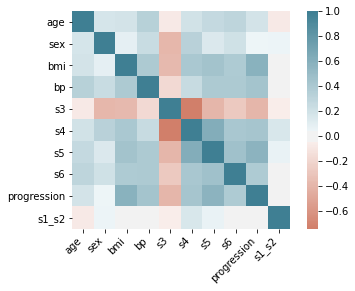

                  age       sex       bmi  ...        s6  progression     s1_s2
age          1.000000  0.173737  0.185085  ...  0.301731     0.187889 -0.074796
sex          0.173737  1.000000  0.088161  ...  0.208133     0.043062  0.049668
bmi          0.185085  0.088161  1.000000  ...  0.388680     0.586450  0.008061
bp           0.335427  0.241013  0.395415  ...  0.390429     0.441484 -0.034569
s3          -0.075181 -0.379090 -0.366811  ... -0.273697    -0.394789 -0.047697
s4           0.203841  0.332115  0.413807  ...  0.417212     0.430453  0.162748
s5           0.270777  0.149918  0.446159  ...  0.464670     0.565883  0.063958
s6           0.301731  0.208133  0.388680  ...  1.000000     0.382483  0.004643
progression  0.187889  0.043062  0.586450  ...  0.382483     1.000000  0.006713
s1_s2       -0.074796  0.049668  0.008061  ...  0.004643     0.006713  1.000000

[10 rows x 10 columns]


In [71]:
# Correlation matrix
diab_corr = diabetes.corr()

# Generate correlation heatmap
ax = sns.heatmap(diab_corr, center=0, cmap=sns.diverging_palette(20,220, n=256), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Print correlations
print(diab_corr)

In [74]:
# Feature engineering
diabetes['s1_s2'] = diabetes['s1'] * diabetes['s2']
diabetes = diabetes.drop(['s1','s2'], axis=1)

# Print variable names
print(diabetes.columns)

# Train/test split
X2 = diabetes.drop('progression', axis=1)
y2 = diabetes['progression']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=123)

Index(['age', 'sex', 'bmi', 'bp', 's3', 's4', 's5', 's6', 'progression',
       's1_s2'],
      dtype='object')


In [75]:
# Instantiate, fit, predict
lin_mod2 = LinearRegression()
lin_mod2.fit(X_train2, y_train2)
y_pred2 = lin_mod2.predict(X_test2)

# Coefficient estimates
print('Coefficients: \n', lin_mod2.coef_)

# Mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test2, y_pred2))

# Explained variance score
print('R_squared score: %.2f' % r2_score(y_test2, y_pred2))

Coefficients: 
 [  -2.33325625 -250.45569362  541.16674251  260.86592129 -338.13983816
  -47.01999461  430.98561453   94.21041896 -283.69973876]
Mean squared error: 2910.42
R_squared score: 0.51


Now you know how to get metrics from your baseline model, how to explore relationships visually, and how to use feature engineering to reduce multicollinearity. You got the same R-squared score, but the MSE was slightly lower! Trying different combinations of feature engineering would likely continue to improve the model.

In [76]:
# Import
from sklearn.decomposition import PCA

# Instantiate
pca = PCA()

# Fit on train
pca.fit(X_train)

# Transform train and test
X_trainPCA = pca.transform(X_train)
X_testPCA = pca.transform(X_test)

In [77]:
# Import
from sklearn.linear_model import LinearRegression

# Instantiate, fit, predict
LinRegr = LinearRegression()
LinRegr.fit(X_trainPCA, y_train)
predictions = LinRegr.predict(X_testPCA)

# The coefficients
print('Coefficients: \n', LinRegr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions))

Coefficients: 
 [ 528.3873541   179.45067701  472.26907701  203.04712586 -215.31629353
  -37.71215219   14.15631646 -342.33993311 -272.87880786]
Mean squared error: 2910.42
Variance score: 0.51


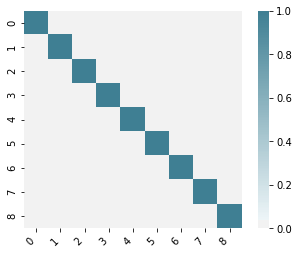

              0             1  ...             7             8
0  1.000000e+00  1.197936e-16  ...  2.329323e-16  1.133532e-16
1  1.197936e-16  1.000000e+00  ...  5.707398e-17  2.829318e-16
2  2.008658e-16 -2.992546e-16  ... -8.162336e-16  1.716372e-15
3  4.874661e-16 -7.811456e-17  ... -1.710050e-17 -5.128531e-16
4  4.928519e-17 -1.059170e-16  ...  2.579707e-16 -4.290115e-16
5 -3.278626e-17 -4.393972e-16  ...  4.355995e-17  1.125441e-16
6  1.620955e-16 -1.139296e-16  ... -2.328796e-16  4.430819e-16
7  2.329323e-16  5.707398e-17  ...  1.000000e+00  8.478449e-16
8  1.133532e-16  2.829318e-16  ...  8.478449e-16  1.000000e+00

[9 rows x 9 columns]


In [78]:
# Correlation matrix
X_trainPCA = pd.DataFrame(X_trainPCA)
diab_corrPCA = X_trainPCA.corr()

# Generate correlation heatmap
ax = sns.heatmap(diab_corrPCA, center=0, cmap=sns.diverging_palette(20,220, n=256), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Print correlations
print(diab_corrPCA)

This simple change, although it didn't improve your metrics, removed all of the multicollinearity in the diabetes dataset!

RF vs GB


|parameter |Random Forest |Gradient Boosting|
|---|---|---|
|n_estimators| 10 |100|
|criterion |gini (or entropy )| friedman_mse|
|max_depth| None |3|
|learning_rate| N/A |0.1|


Random forest vs gradient boosting

What are the main similarities and differences of Random Forest (RF) and Gradient Boosting (GB)algorithms?

- Random Forest and Gradient Boosting machine learning techniques create multiple random samples that are used to produce a final prediction model.

- Random Forest uses the bootstrapping method while Gradient Boosting uses weights given to incorrectly predicted observations from a previous sample applied to subsequent samples.


- The final prediction of Random Forest uses a decision tree and is an average of all generated bootstrap samples, while the final prediction of Gradient Boosting is a weighted average of the generated weak learners and can use any algorithm.

- While GB can use any algorithm, RF uses decision trees!

In [81]:
# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])

# Impute with mean
imp_mean = SimpleImputer(strategy='mean')
loans_imp_mean = imp_mean.fit_transform(numeric_cols)

# Convert returned array to DataFrame
scaler = StandardScaler()
loans_imp_meanDF = pd.DataFrame(loans_imp_mean, columns=numeric_cols.columns)
loans_imp_meanDF = pd.DataFrame(scaler.fit_transform(loans_imp_meanDF), columns=numeric_cols.columns)

# Create X matrix and y array
X = loans_imp_meanDF.select_dtypes(include=[np.number]).drop('Loan Status', axis=1)
y = loan_data["Loan Status"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [82]:
# Import
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Instantiate, fit, predict
rf_model = RandomForestClassifier(n_estimators=50, random_state=123, oob_score = True)
rf_model = rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Print evaluation metrics
print("Random Forest Accuracy: {}".format(accuracy_score(y_test, rf_pred)))
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, rf_pred)))
print("Precision: {}".format(precision_score(y_test, rf_pred)))
print("Recall: {}".format(recall_score(y_test, rf_pred)))
print("F1: {}".format(f1_score(y_test, rf_pred)))

Random Forest Accuracy: 0.7244779364900836
Confusion matrix:
 [[17514  1636]
 [ 5713  1810]]
Precision: 0.5252466627974464
Recall: 0.24059550711152466
F1: 0.33002096818306137


In [83]:
# Import
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Instantiate, fit, predict
gb_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.01,random_state=123)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Print evaluation metrics
print("Gradient Boosting Accuracy: {}".format(accuracy_score(y_test, gb_pred)))
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, gb_pred)))
print("Precision: {}".format(precision_score(y_test, gb_pred)))
print("Recall: {}".format(recall_score(y_test, gb_pred)))
print("F1: {}".format(f1_score(y_test, gb_pred)))

Gradient Boosting Accuracy: 0.7179544858096202
Confusion matrix:
 [[19150     0]
 [ 7523     0]]
Precision: 0.0
Recall: 0.0
F1: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
